In [22]:
import os
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pickle

def combine_monthly_IMERG(base_folder, year, month):
    folder_path = os.path.join(base_folder, str(year), 'global')
    month_str = f'{month:02d}'  # Format month as a 2-digit string
    file_name = f'{year}_{month_str}_global_precipitation.npz'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):  # Check if the file exists
        data = np.load(file_path)
        prec = data['all_values']
        return prec[~np.isnan(prec)]
    return np.array([])

def combine_monthly_GISS(base_folder, year, month):
    month_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    folder_path = os.path.join(base_folder, str(year))
    month_str = month_names[month - 1]  # Get the three-letter month abbreviation
    file_name = f'{month_str}{year}.aijh12iWISO_20th_MERRA2_ANL.nc'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):  # Check if the file exists
        dataset = nc.Dataset(file_path)
        prec = dataset.variables['prec'][:, :, :]
        return np.nan_to_num(prec.flatten())
    return np.array([]) 

def histogramPrec(giss_data, imerg_data, title, output_path):
    giss_avg, giss_95th, giss_99th = np.mean(giss_data), np.percentile(giss_data, 95), np.percentile(giss_data, 99)
    imerg_avg, imerg_95th, imerg_99th = np.mean(imerg_data), np.percentile(imerg_data, 95), np.percentile(imerg_data, 99)

    combined_min = min(np.min(giss_data), np.min(imerg_data))
    combined_max = max(np.max(giss_data), np.max(imerg_data))
    bins = np.linspace(combined_min, combined_max, 50)

    plt.hist(imerg_data, bins=bins, log=True, density=True, alpha=0.5, color='blue', label='IMERG')
    plt.hist(giss_data, bins=bins, log=True, density=True, alpha=0.5, color='red', label='GISS')

    plt.axvline(x=giss_99th, color='red', linestyle='dotted', label='GISS 99th percentile')
    plt.axvline(x=imerg_99th, color='blue', linestyle='dotted', label='IMERG 99th percentile')

    plt.title(title)
    plt.xlabel('Precipitation (mm/day)')
    plt.ylabel('Density (log scale)')
    plt.legend()
    # plt.xlim(0, 550)
    # plt.ylim(10**-5.5, 1e-1)

    plt.text(0.66, 0.53, f'GISS Avg: {giss_avg:.2f}\nIMERG Avg: {imerg_avg:.2f}\n\nGISS 95th %: {giss_95th:.2f}\nIMERG 95th %: {imerg_95th:.2f}\n\nGISS 99th %: {giss_99th:.2f}\nIMERG 99th %: {imerg_99th:.2f}', 
             horizontalalignment='left', verticalalignment='center', 
             transform=plt.gca().transAxes, color='black', fontsize=7)

    plt.show()
    plt.savefig(output_path, dpi=300)
    print(f"Saved plot to {output_path}.")
    plt.close()


## GISS vs IMERG Precipitation Histogram for 2011

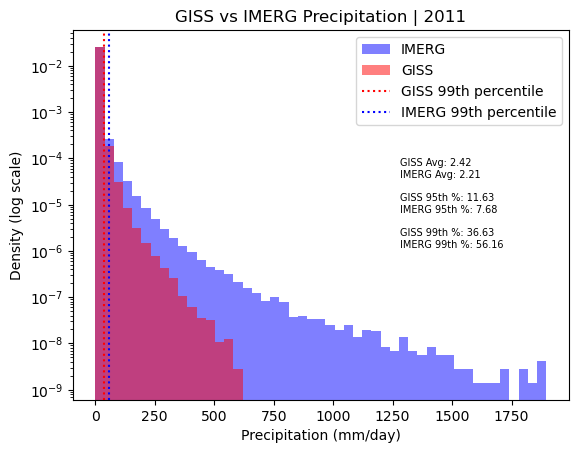

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2011.png.


In [23]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2011, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2011, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2011.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2011", output_path)


## GISS vs IMERG Precipitation Histogram for 2012

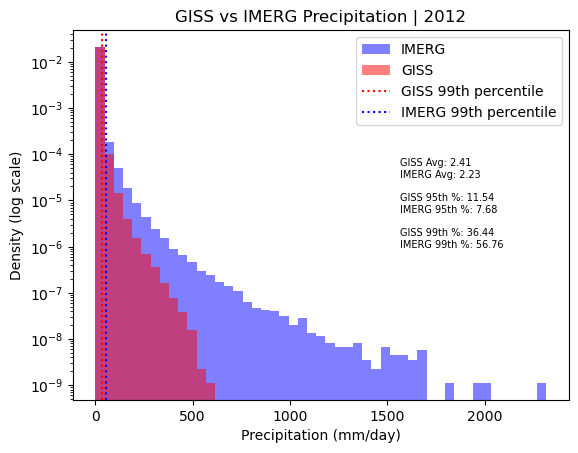

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2012.png.


In [24]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2012, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2012, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2012.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2012", output_path)


## GISS vs IMERG Precipitation Histogram for 2013

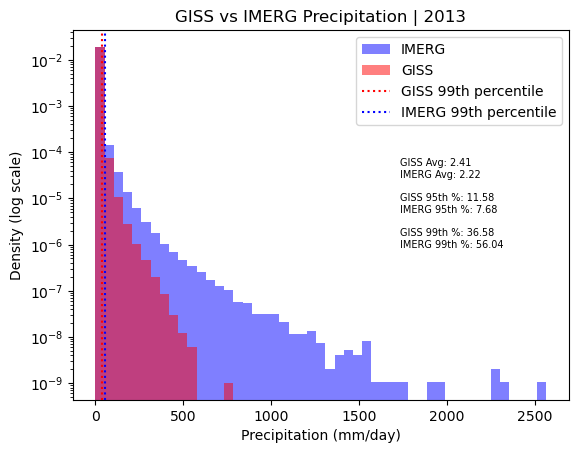

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2013.png.


In [25]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2013, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2013, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2013.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2013", output_path)


## GISS vs IMERG Precipitation Histogram for 2014

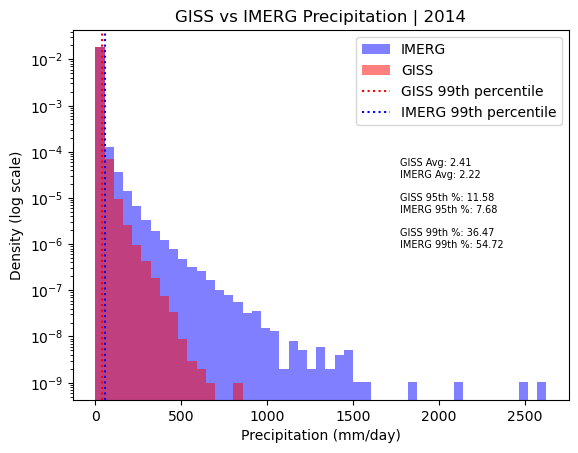

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2014.png.


In [26]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2014, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2014, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2014.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2014", output_path)


## GISS vs IMERG Precipitation Histogram for 2015

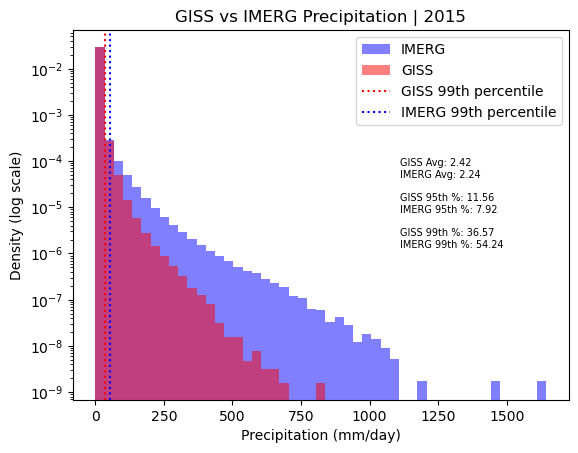

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2015.png.


In [27]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2015, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2015, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2015.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2015", output_path)


## GISS vs IMERG Precipitation Histogram for 2016

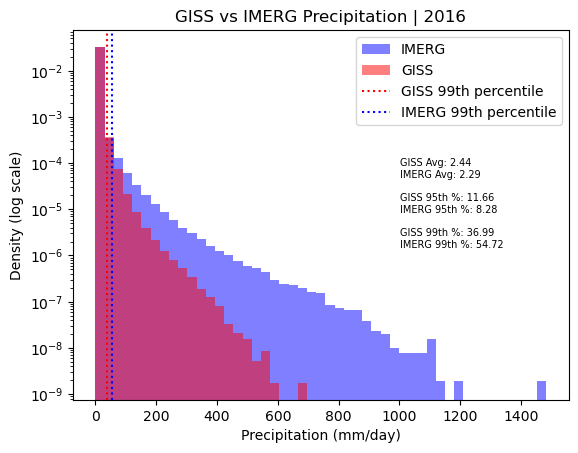

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2016.png.


In [28]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2016, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2016, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2016.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2016", output_path)


## GISS vs IMERG Precipitation Histogram for 2017

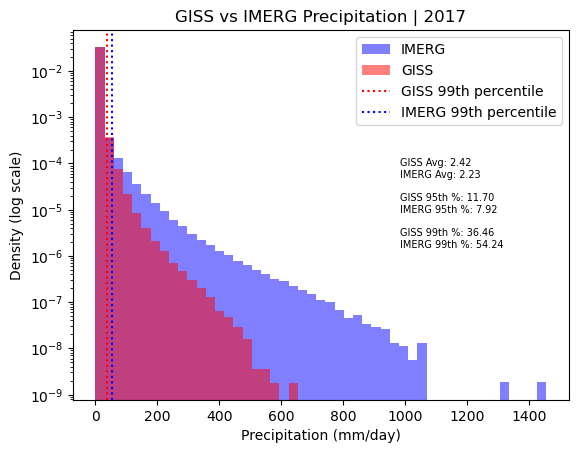

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2017.png.


In [29]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2017, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2017, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2017.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2017", output_path)


## GISS vs IMERG Precipitation Histogram for 2018

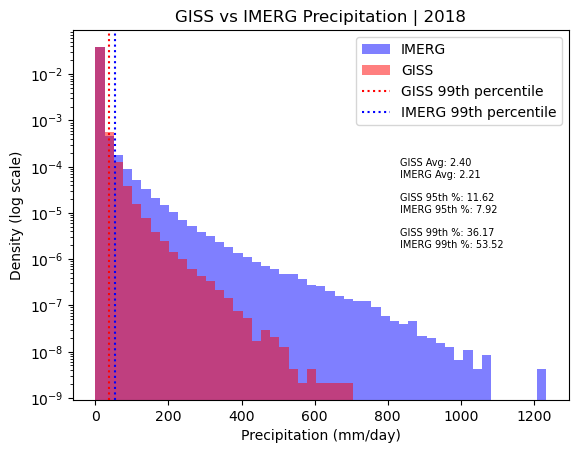

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2018.png.


In [30]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2018, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2018, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2018.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2018", output_path)


## GISS vs IMERG Precipitation Histogram for 2019

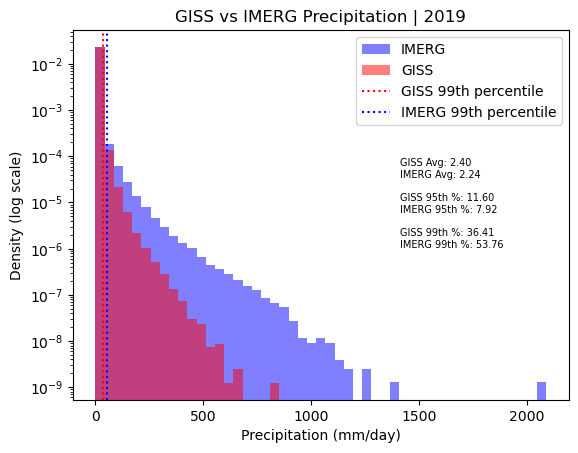

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2019.png.


In [31]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2019, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2019, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2019.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2019", output_path)


## GISS vs IMERG Precipitation Histogram for 2020

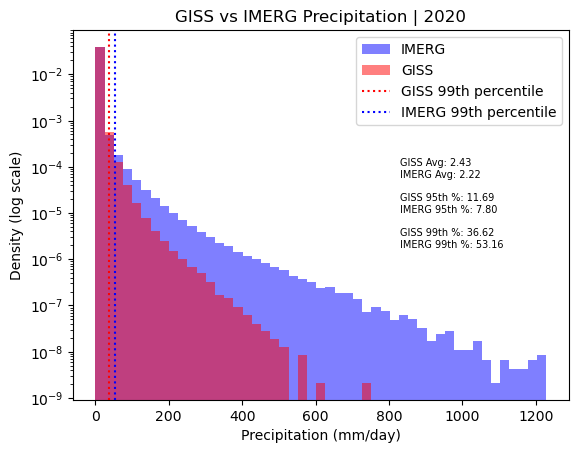

Saved plot to /Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2020.png.


In [32]:

base_folder_imerg = '/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_automated'
base_folder_giss = '/Users/lilydonaldson/Downloads/examples/data/GISS/GISS_subdaily'

giss_data_yearly = []
imerg_data_yearly = []

for month in range(1, 13):
    giss_data = combine_monthly_GISS(base_folder_giss, 2020, month)
    imerg_data = combine_monthly_IMERG(base_folder_imerg, 2020, month)
    
    giss_data_yearly.extend(giss_data)
    imerg_data_yearly.extend(imerg_data)

giss_data_yearly = np.array(giss_data_yearly)
imerg_data_yearly = np.array(imerg_data_yearly)

output_path = f'/Users/lilydonaldson/Downloads/examples/data/IMERG/IMERG_pickles/IMERG_vs_GISS_2020.png'
histogramPrec(giss_data_yearly, imerg_data_yearly, f"GISS vs IMERG Precipitation | 2020", output_path)
